# M Analysis


In [3]:
import sys,os
from fitlab.resman import RESMAN
from fitlab.mcsamp import MCSAMP
from tools.config import load_config,conf
from tools.tools import load, save,checkdir
from tools.mcstat import chi2hist, parhist
from tools.mcproc import impose_cdf_cut
import pylab as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
import copy
def lprint(msg):
   sys.stdout.write('\r')
   sys.stdout.write('%s' %msg)
   sys.stdout.flush()
%matplotlib inline

In [5]:
load_config('./input.py') 
conf['resman'] = RESMAN(mode='solo',ip=None,nworkers=5)
res=conf['resman'].get_residuals(conf['parman'].par)
npts=len(res[0])
print '\nnumber of data points = ',npts

loading sidis data sets 1007
number of data points =  978


## Load M data from files

In [6]:
ALL=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys()])

ALL.columns

Index([      u'Ebeam',          u'F2',           u'N',          u'Q2',
             u'Shift',          u'W2',       u'alpha',         u'col',
                u'dy',      u'hadron',           u'i',         u'obs',
                u'pT', u'r-residuals',   u'residuals',       u'shift',
            u'stat_u',   u'systabs_u',     u'systole',     u'systrel',
            u'target',         u'thy',       u'value',           u'x',
                 u'y',          u'yh',          u'yp',           u'z'],
      dtype='object')

## Organize data
Organize data from different collaborations with different observables

In [7]:
data = {}
collaborations = np.unique(ALL.col)

for collab in collaborations:
    data[collab] = {}
    
    data_subset = ALL[ALL.col == collab]
    observables = np.unique(data_subset.obs)
    
    for observable in observables:        
        data[collab][observable] = data_subset[data_subset.obs == observable]        
        print('Collaboration: %s, Observerable: %s, Points: %d' % (collab, observable, len(data[collab][observable])))

Collaboration: hermes, Observerable: M, Points: 978


## Plot results 
Plot the data vs. theory curves

In [8]:
data = {}

for key, value in conf['resman'].sidisres.tabs.iteritems():
    data[key] = pd.DataFrame(value)

In [9]:
plt.rc('font', family='serif')
plt.rc('font', size=16)

In [10]:
ALL=pd.concat([pd.DataFrame(conf['resman'].sidisres.tabs[idx]) \
              for idx in conf['resman'].sidisres.tabs.keys()])

ALL.columns

Index([      u'Ebeam',          u'F2',           u'N',          u'Q2',
             u'Shift',          u'W2',       u'alpha',         u'col',
                u'dy',      u'hadron',           u'i',         u'obs',
                u'pT', u'r-residuals',   u'residuals',       u'shift',
            u'stat_u',   u'systabs_u',     u'systole',     u'systrel',
            u'target',         u'thy',       u'value',           u'x',
                 u'y',          u'yh',          u'yp',           u'z'],
      dtype='object')

In [11]:
def plotHERMES(dat,label1='dataset 1'):
    
    if (dat % 2 == 0):
        col = 'red'
    if (dat % 2 == 1):
        col = 'blue'
    data1=data[dat]
    data1['xr']=[np.round(x,2) for x in data1.x]
    ZR=[[0.1,0.2],[0.2,0.25],[0.25,0.3],[0.3,0.4],[0.4,0.5],[0.5,1]]
    
    nrows,ncols=6,6
    fig = py.figure(figsize=(ncols*3,nrows*2))
    cnt=0
    for xr in np.unique(data1['xr']):
        tabx=data1.query('xr==%f'%xr)
        for zr in ZR:
            tabz=tabx.query('z>%f and z<%f'%(zr[0],zr[1]))
            cnt+=1
            ax=py.subplot(nrows,ncols,cnt)
            
            ax.errorbar(tabz['pT'],tabz['value'],yerr=tabz['alpha'],fmt='k.', label=label1, color = col)
            ax.plot(tabz['pT'], tabz['thy'], linestyle='-', color=col)
        
    py.tight_layout()

    

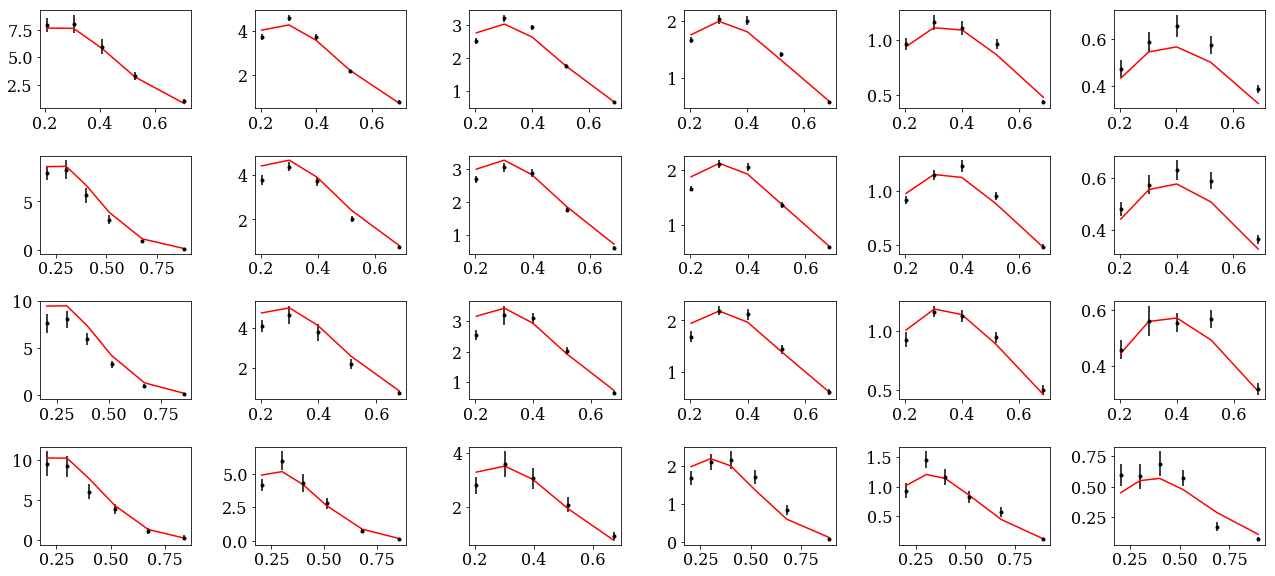

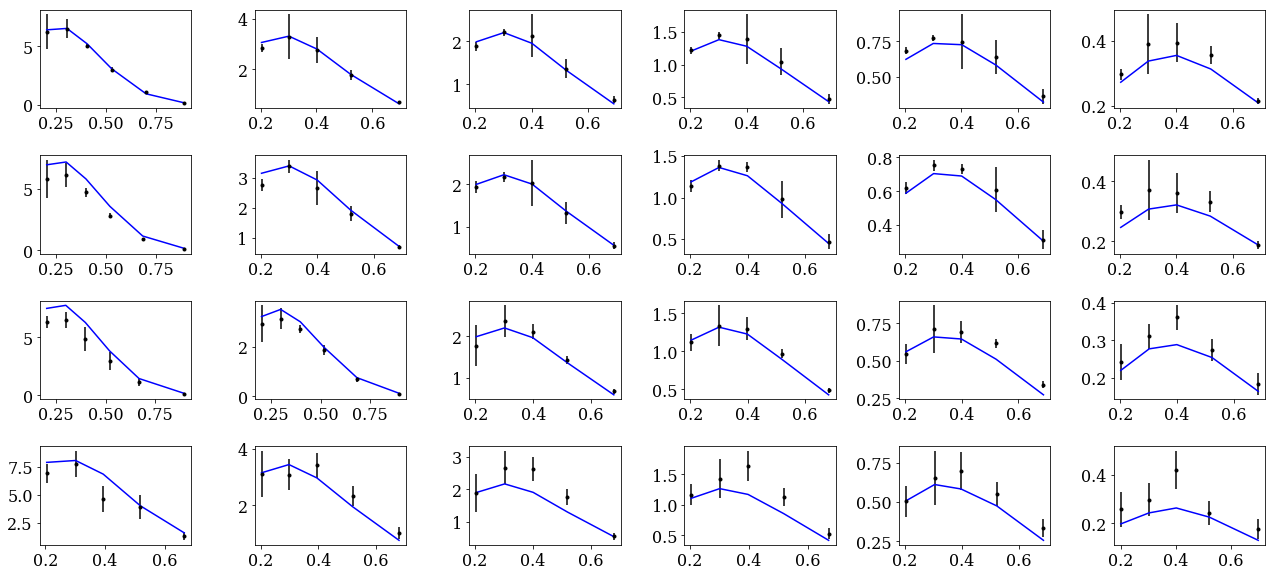

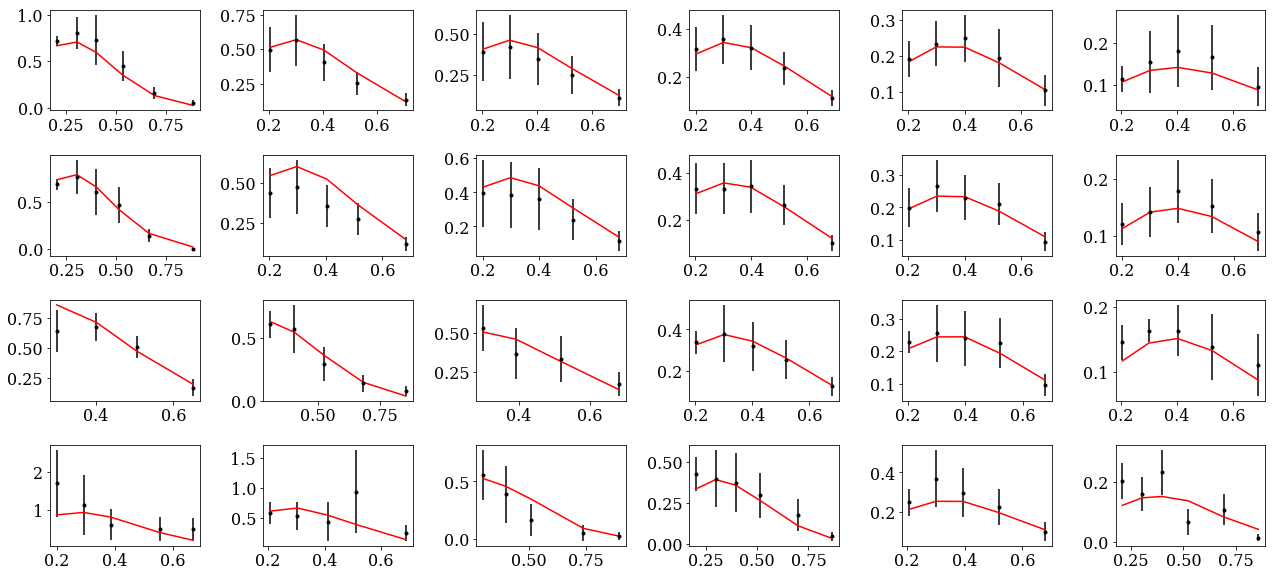

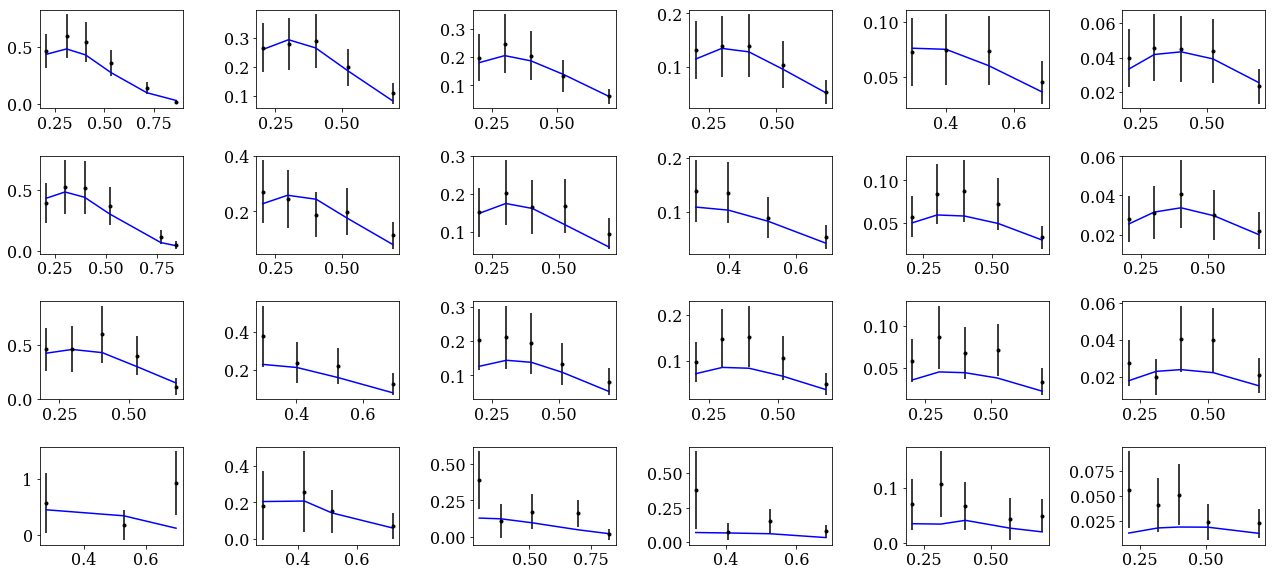

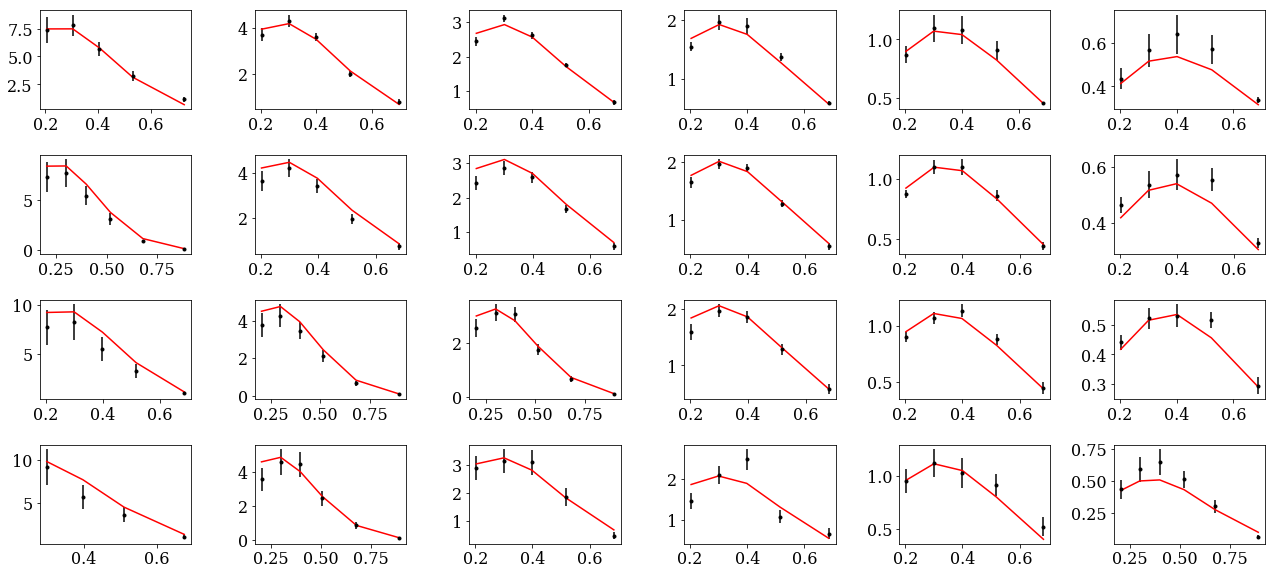

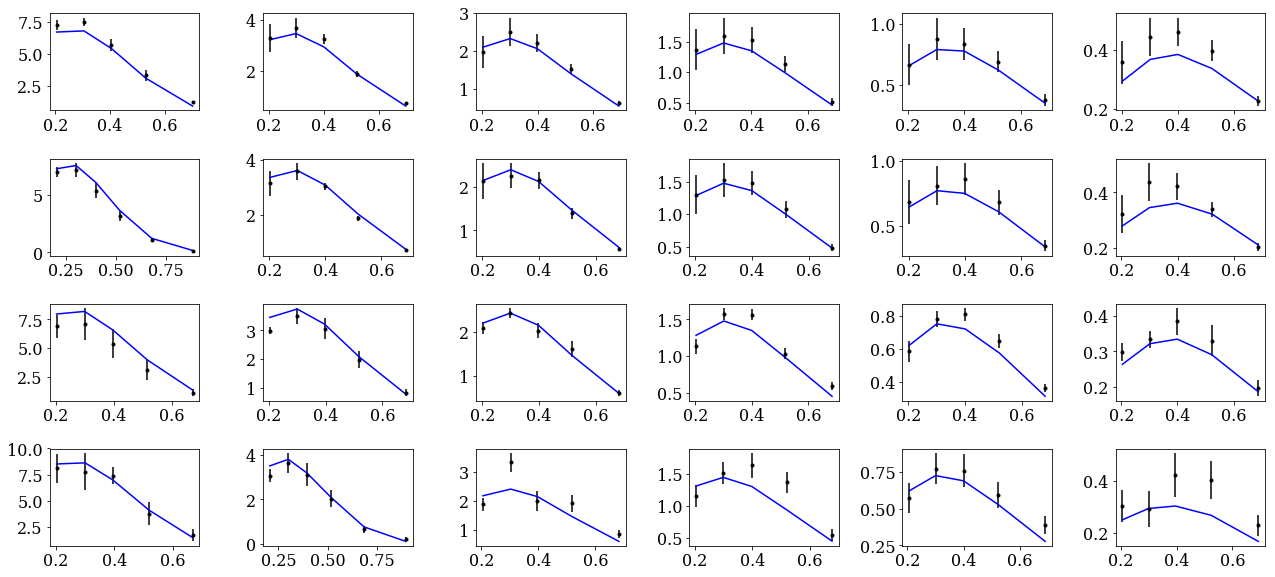

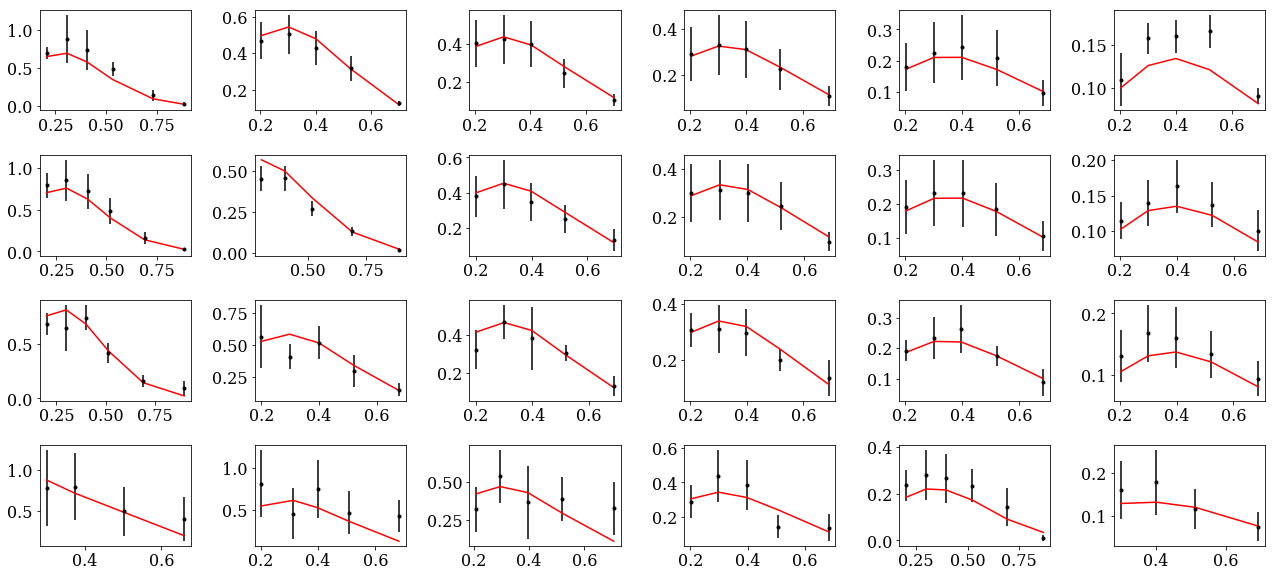

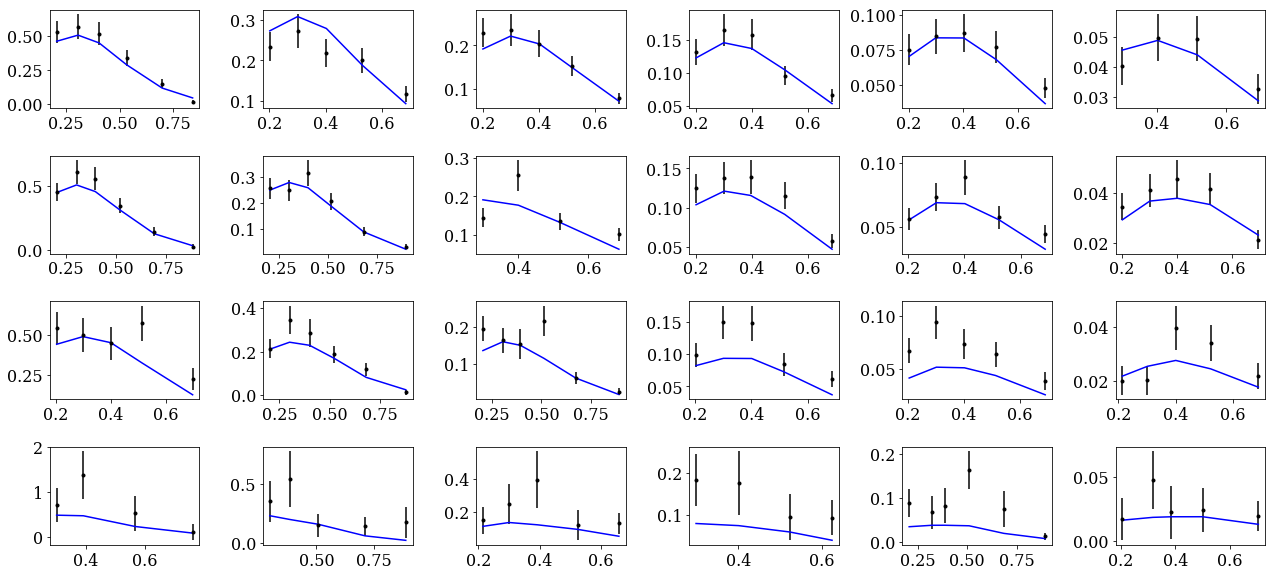

In [12]:
lis = [1000,1001,1002,1003,1004,1005,1006,1007]

for dat in lis:
    
    plotHERMES(dat, 'M')
    

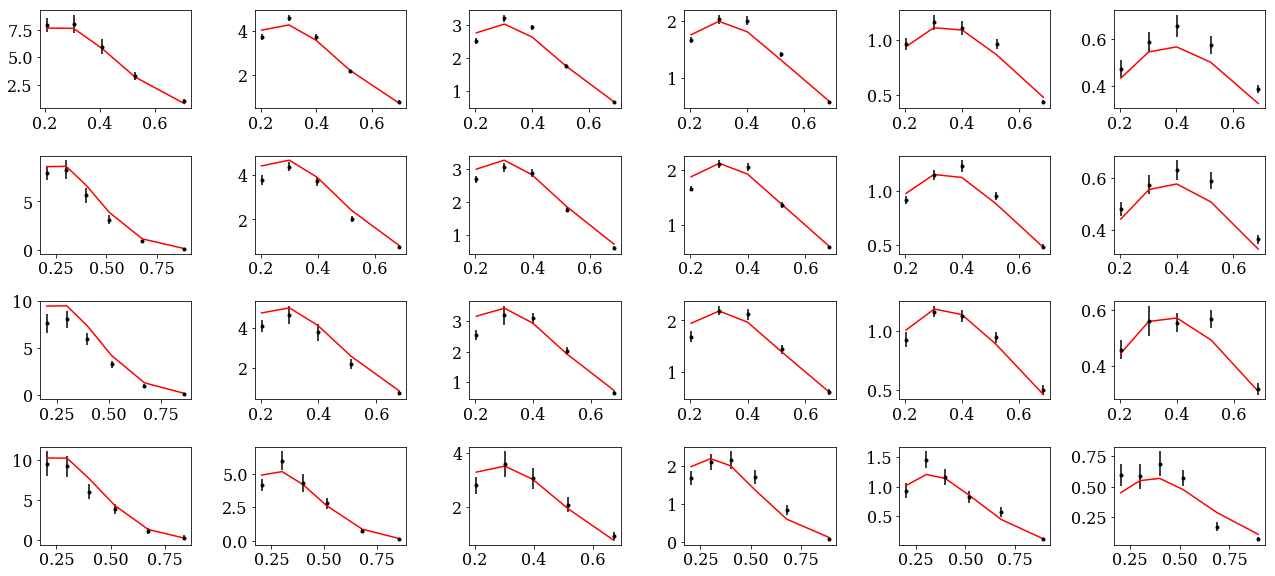

In [13]:
plotHERMES(1000, 'M')